In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/point_history_classifier/point_history.csv'
model_save_path = 'model/point_history_classifier/point_history_classifier.hdf5'

# Set number of classes

In [3]:
NUM_CLASSES = 7

# Input length

In [4]:
TIME_STEPS = 16
DIMENSION = 2

# Dataset reading

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [8]:
use_lstm = False
model = None

if use_lstm:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION, )), 
        #tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(16, input_shape=[TIME_STEPS, DIMENSION]),
        #tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        #tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        #tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                792       
                                                                 
 dense_1 (Dense)             (None, 10)                250       
                                                                 
 dense_2 (Dense)             (None, 7)                 77        
                                                                 
Total params: 1,119
Trainable params: 1,119
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
87/98 [=========================>....] - ETA: 0s - loss: 1.8713 - accuracy: 0.3225
Epoch 1: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 1s 3ms/step - loss: 1.8620 - accuracy: 0.3297 - val_loss: 1.7894 - val_accuracy: 0.3737
Epoch 2/1000
81/98 [=======================>......] - ETA: 0s - loss: 1.7313 - accuracy: 0.3848
Epoch 2: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 1.7235 - accuracy: 0.3839 - val_loss: 1.6706 - val_accuracy: 0.4086
Epoch 3/1000
87/98 [=========================>....] - ETA: 0s - loss: 1.6178 - accuracy: 0.4056
Epoch 3: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 1.6145 - accuracy: 0.4080 - val_loss: 1.5658 - val_accuracy: 0.4278
Epoch 4/1000
92/98 [===========================>..] - ETA: 0s - los

85/98 [=========================>....] - ETA: 0s - loss: 1.0694 - accuracy: 0.6324
Epoch 27: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 1.0630 - accuracy: 0.6336 - val_loss: 1.1015 - val_accuracy: 0.6184
Epoch 28/1000
56/98 [================>.............] - ETA: 0s - loss: 1.0477 - accuracy: 0.6350
Epoch 28: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 1.0552 - accuracy: 0.6354 - val_loss: 1.0980 - val_accuracy: 0.6208
Epoch 29/1000
53/98 [===============>..............] - ETA: 0s - loss: 1.0335 - accuracy: 0.6453
Epoch 29: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 1.0485 - accuracy: 0.6361 - val_loss: 1.0912 - val_accuracy: 0.6256
Epoch 30/1000
50/98 [==============>...............] - ETA: 0s - loss: 1.03

75/98 [=====================>........] - ETA: 0s - loss: 0.9413 - accuracy: 0.6815
Epoch 53: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.9344 - accuracy: 0.6819 - val_loss: 0.9905 - val_accuracy: 0.6672
Epoch 54/1000
93/98 [===========================>..] - ETA: 0s - loss: 0.9309 - accuracy: 0.6822
Epoch 54: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.9311 - accuracy: 0.6826 - val_loss: 0.9843 - val_accuracy: 0.6701
Epoch 55/1000
79/98 [=======================>......] - ETA: 0s - loss: 0.9226 - accuracy: 0.6835
Epoch 55: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.9283 - accuracy: 0.6850 - val_loss: 0.9807 - val_accuracy: 0.6737
Epoch 56/1000
88/98 [=========================>....] - ETA: 0s - loss: 0.92

50/98 [==============>...............] - ETA: 0s - loss: 0.8460 - accuracy: 0.7134
Epoch 79: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.8563 - accuracy: 0.7132 - val_loss: 0.9232 - val_accuracy: 0.7004
Epoch 80/1000
89/98 [==========================>...] - ETA: 0s - loss: 0.8576 - accuracy: 0.7135
Epoch 80: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.8548 - accuracy: 0.7136 - val_loss: 0.9261 - val_accuracy: 0.6995
Epoch 81/1000
90/98 [==========================>...] - ETA: 0s - loss: 0.8556 - accuracy: 0.7151
Epoch 81: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.8526 - accuracy: 0.7144 - val_loss: 0.9208 - val_accuracy: 0.6966
Epoch 82/1000
82/98 [========================>.....] - ETA: 0s - loss: 0.84

93/98 [===========================>..] - ETA: 0s - loss: 0.8037 - accuracy: 0.7386
Epoch 105: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.8040 - accuracy: 0.7374 - val_loss: 0.8852 - val_accuracy: 0.7192
Epoch 106/1000
93/98 [===========================>..] - ETA: 0s - loss: 0.8009 - accuracy: 0.7394
Epoch 106: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.8030 - accuracy: 0.7395 - val_loss: 0.8865 - val_accuracy: 0.7146
Epoch 107/1000
93/98 [===========================>..] - ETA: 0s - loss: 0.8012 - accuracy: 0.7384
Epoch 107: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.8003 - accuracy: 0.7381 - val_loss: 0.8848 - val_accuracy: 0.7175
Epoch 108/1000
91/98 [==========================>...] - ETA: 0s - loss

51/98 [==============>...............] - ETA: 0s - loss: 0.7684 - accuracy: 0.7518
Epoch 131: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.7687 - accuracy: 0.7503 - val_loss: 0.8692 - val_accuracy: 0.7214
Epoch 132/1000
50/98 [==============>...............] - ETA: 0s - loss: 0.7572 - accuracy: 0.7484
Epoch 132: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.7672 - accuracy: 0.7497 - val_loss: 0.8666 - val_accuracy: 0.7262
Epoch 133/1000
51/98 [==============>...............] - ETA: 0s - loss: 0.7672 - accuracy: 0.7523
Epoch 133: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.7651 - accuracy: 0.7522 - val_loss: 0.8656 - val_accuracy: 0.7243
Epoch 134/1000
92/98 [===========================>..] - ETA: 0s - loss

94/98 [===========================>..] - ETA: 0s - loss: 0.7398 - accuracy: 0.7608
Epoch 157: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.7410 - accuracy: 0.7604 - val_loss: 0.8511 - val_accuracy: 0.7298
Epoch 158/1000
91/98 [==========================>...] - ETA: 0s - loss: 0.7391 - accuracy: 0.7587
Epoch 158: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.7402 - accuracy: 0.7584 - val_loss: 0.8545 - val_accuracy: 0.7298
Epoch 159/1000
96/98 [============================>.] - ETA: 0s - loss: 0.7399 - accuracy: 0.7601
Epoch 159: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.7406 - accuracy: 0.7601 - val_loss: 0.8503 - val_accuracy: 0.7332
Epoch 160/1000
98/98 [==============================] - ETA: 0s - loss

95/98 [============================>.] - ETA: 0s - loss: 0.7226 - accuracy: 0.7655
Epoch 183: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.7216 - accuracy: 0.7652 - val_loss: 0.8361 - val_accuracy: 0.7334
Epoch 184/1000
97/98 [============================>.] - ETA: 0s - loss: 0.7207 - accuracy: 0.7634
Epoch 184: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.7208 - accuracy: 0.7635 - val_loss: 0.8371 - val_accuracy: 0.7334
Epoch 185/1000
49/98 [==============>...............] - ETA: 0s - loss: 0.7220 - accuracy: 0.7695
Epoch 185: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.7214 - accuracy: 0.7667 - val_loss: 0.8347 - val_accuracy: 0.7363
Epoch 186/1000
97/98 [============================>.] - ETA: 0s - loss

98/98 [==============================] - ETA: 0s - loss: 0.7045 - accuracy: 0.7724
Epoch 209: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.7045 - accuracy: 0.7724 - val_loss: 0.8250 - val_accuracy: 0.7394
Epoch 210/1000
97/98 [============================>.] - ETA: 0s - loss: 0.7029 - accuracy: 0.7700
Epoch 210: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.7023 - accuracy: 0.7700 - val_loss: 0.8257 - val_accuracy: 0.7406
Epoch 211/1000
50/98 [==============>...............] - ETA: 0s - loss: 0.6931 - accuracy: 0.7736
Epoch 211: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.7026 - accuracy: 0.7699 - val_loss: 0.8250 - val_accuracy: 0.7433
Epoch 212/1000
97/98 [============================>.] - ETA: 0s - loss

84/98 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.7758
Epoch 235: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.7744 - val_loss: 0.8183 - val_accuracy: 0.7399
Epoch 236/1000
90/98 [==========================>...] - ETA: 0s - loss: 0.6849 - accuracy: 0.7768
Epoch 236: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.7753 - val_loss: 0.8184 - val_accuracy: 0.7409
Epoch 237/1000
51/98 [==============>...............] - ETA: 0s - loss: 0.6904 - accuracy: 0.7727
Epoch 237: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.7738 - val_loss: 0.8161 - val_accuracy: 0.7430
Epoch 238/1000
86/98 [=========================>....] - ETA: 0s - loss

90/98 [==========================>...] - ETA: 0s - loss: 0.6770 - accuracy: 0.7753
Epoch 261: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.7752 - val_loss: 0.8086 - val_accuracy: 0.7401
Epoch 262/1000
92/98 [===========================>..] - ETA: 0s - loss: 0.6752 - accuracy: 0.7748
Epoch 262: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.6760 - accuracy: 0.7760 - val_loss: 0.8119 - val_accuracy: 0.7445
Epoch 263/1000
96/98 [============================>.] - ETA: 0s - loss: 0.6735 - accuracy: 0.7766
Epoch 263: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.6774 - accuracy: 0.7765 - val_loss: 0.8089 - val_accuracy: 0.7423
Epoch 264/1000
96/98 [============================>.] - ETA: 0s - loss

88/98 [=========================>....] - ETA: 0s - loss: 0.6736 - accuracy: 0.7749
Epoch 287: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.6671 - accuracy: 0.7776 - val_loss: 0.8037 - val_accuracy: 0.7409
Epoch 288/1000
89/98 [==========================>...] - ETA: 0s - loss: 0.6651 - accuracy: 0.7803
Epoch 288: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.6670 - accuracy: 0.7795 - val_loss: 0.8017 - val_accuracy: 0.7421
Epoch 289/1000
51/98 [==============>...............] - ETA: 0s - loss: 0.6741 - accuracy: 0.7782
Epoch 289: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.6669 - accuracy: 0.7777 - val_loss: 0.8065 - val_accuracy: 0.7392
Epoch 290/1000
49/98 [==============>...............] - ETA: 0s - loss

97/98 [============================>.] - ETA: 0s - loss: 0.6571 - accuracy: 0.7771
Epoch 313: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.6579 - accuracy: 0.7769 - val_loss: 0.7968 - val_accuracy: 0.7428
Epoch 314/1000
96/98 [============================>.] - ETA: 0s - loss: 0.6593 - accuracy: 0.7760
Epoch 314: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.6582 - accuracy: 0.7767 - val_loss: 0.7966 - val_accuracy: 0.7401
Epoch 315/1000
91/98 [==========================>...] - ETA: 0s - loss: 0.6590 - accuracy: 0.7798
Epoch 315: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.6576 - accuracy: 0.7791 - val_loss: 0.7954 - val_accuracy: 0.7457
Epoch 316/1000
93/98 [===========================>..] - ETA: 0s - loss

98/98 [==============================] - ETA: 0s - loss: 0.6503 - accuracy: 0.7802
Epoch 339: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.6503 - accuracy: 0.7802 - val_loss: 0.7922 - val_accuracy: 0.7490
Epoch 340/1000
92/98 [===========================>..] - ETA: 0s - loss: 0.6474 - accuracy: 0.7794
Epoch 340: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.6506 - accuracy: 0.7792 - val_loss: 0.7881 - val_accuracy: 0.7474
Epoch 341/1000
96/98 [============================>.] - ETA: 0s - loss: 0.6503 - accuracy: 0.7798
Epoch 341: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.6503 - accuracy: 0.7795 - val_loss: 0.7879 - val_accuracy: 0.7445
Epoch 342/1000
95/98 [============================>.] - ETA: 0s - loss

90/98 [==========================>...] - ETA: 0s - loss: 0.6435 - accuracy: 0.7812
Epoch 365: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.6431 - accuracy: 0.7826 - val_loss: 0.7894 - val_accuracy: 0.7488
Epoch 366/1000
92/98 [===========================>..] - ETA: 0s - loss: 0.6411 - accuracy: 0.7818
Epoch 366: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.6431 - accuracy: 0.7819 - val_loss: 0.7882 - val_accuracy: 0.7493
Epoch 367/1000
92/98 [===========================>..] - ETA: 0s - loss: 0.6397 - accuracy: 0.7858
Epoch 367: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.6417 - accuracy: 0.7854 - val_loss: 0.7868 - val_accuracy: 0.7478
Epoch 368/1000
93/98 [===========================>..] - ETA: 0s - loss

91/98 [==========================>...] - ETA: 0s - loss: 0.6388 - accuracy: 0.7835
Epoch 391: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.6361 - accuracy: 0.7845 - val_loss: 0.7889 - val_accuracy: 0.7505
Epoch 392/1000
94/98 [===========================>..] - ETA: 0s - loss: 0.6343 - accuracy: 0.7857
Epoch 392: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.6370 - accuracy: 0.7849 - val_loss: 0.7857 - val_accuracy: 0.7512
Epoch 393/1000
93/98 [===========================>..] - ETA: 0s - loss: 0.6398 - accuracy: 0.7850
Epoch 393: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.6354 - accuracy: 0.7865 - val_loss: 0.7808 - val_accuracy: 0.7514
Epoch 394/1000
96/98 [============================>.] - ETA: 0s - loss

48/98 [=============>................] - ETA: 0s - loss: 0.6375 - accuracy: 0.7856
Epoch 417: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.6318 - accuracy: 0.7865 - val_loss: 0.7793 - val_accuracy: 0.7543
Epoch 418/1000
94/98 [===========================>..] - ETA: 0s - loss: 0.6306 - accuracy: 0.7869
Epoch 418: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.6313 - accuracy: 0.7869 - val_loss: 0.7803 - val_accuracy: 0.7519
Epoch 419/1000
97/98 [============================>.] - ETA: 0s - loss: 0.6306 - accuracy: 0.7855
Epoch 419: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.6309 - accuracy: 0.7855 - val_loss: 0.7794 - val_accuracy: 0.7555
Epoch 420/1000
96/98 [============================>.] - ETA: 0s - loss

95/98 [============================>.] - ETA: 0s - loss: 0.6232 - accuracy: 0.7905
Epoch 443: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.6261 - accuracy: 0.7896 - val_loss: 0.7778 - val_accuracy: 0.7565
Epoch 444/1000
96/98 [============================>.] - ETA: 0s - loss: 0.6267 - accuracy: 0.7887
Epoch 444: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.7889 - val_loss: 0.7793 - val_accuracy: 0.7548
Epoch 445/1000
96/98 [============================>.] - ETA: 0s - loss: 0.6267 - accuracy: 0.7885
Epoch 445: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.6255 - accuracy: 0.7889 - val_loss: 0.7812 - val_accuracy: 0.7529
Epoch 446/1000
94/98 [===========================>..] - ETA: 0s - loss

96/98 [============================>.] - ETA: 0s - loss: 0.6220 - accuracy: 0.7883
Epoch 469: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.6213 - accuracy: 0.7886 - val_loss: 0.7788 - val_accuracy: 0.7531
Epoch 470/1000
94/98 [===========================>..] - ETA: 0s - loss: 0.6215 - accuracy: 0.7897
Epoch 470: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.6214 - accuracy: 0.7901 - val_loss: 0.7810 - val_accuracy: 0.7548
Epoch 471/1000
89/98 [==========================>...] - ETA: 0s - loss: 0.6225 - accuracy: 0.7886
Epoch 471: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.6211 - accuracy: 0.7899 - val_loss: 0.7773 - val_accuracy: 0.7565
Epoch 472/1000
94/98 [===========================>..] - ETA: 0s - loss

88/98 [=========================>....] - ETA: 0s - loss: 0.6174 - accuracy: 0.7905
Epoch 495: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.6158 - accuracy: 0.7901 - val_loss: 0.7797 - val_accuracy: 0.7565
Epoch 496/1000
90/98 [==========================>...] - ETA: 0s - loss: 0.6149 - accuracy: 0.7935
Epoch 496: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.6174 - accuracy: 0.7926 - val_loss: 0.7782 - val_accuracy: 0.7541
Epoch 497/1000
85/98 [=========================>....] - ETA: 0s - loss: 0.6180 - accuracy: 0.7921
Epoch 497: saving model to model/point_history_classifier\point_history_classifier.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 0.6171 - accuracy: 0.7919 - val_loss: 0.7786 - val_accuracy: 0.7577
Epoch 498/1000
50/98 [==============>...............] - ETA: 0s - loss

In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[0.7292991  0.03782793 0.05771473 0.02309211 0.01746891 0.08542494
 0.04917222]
0


# Confusion matrix

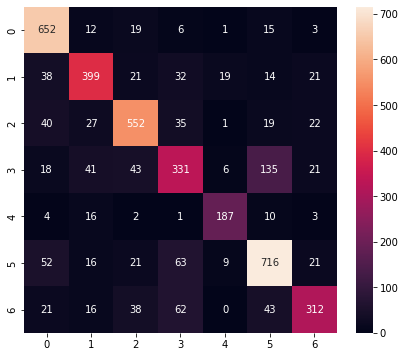

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       708
           1       0.76      0.73      0.75       544
           2       0.79      0.79      0.79       696
           3       0.62      0.56      0.59       595
           4       0.84      0.84      0.84       223
           5       0.75      0.80      0.77       898
           6       0.77      0.63      0.70       492

    accuracy                           0.76      4156
   macro avg       0.76      0.75      0.76      4156
weighted avg       0.76      0.76      0.75      4156



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

In [17]:
tflite_save_path = 'model/point_history_classifier/point_history_classifier.tflite'

In [18]:
# Transform model (quantization)
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Kawai\AppData\Local\Temp\tmphy42ro65\assets


6432

# Inference test

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [20]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'serving_default_input_1:0', 'index': 0, 'shape': array([ 1, 32]), 'shape_signature': array([-1, 32]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [21]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [22]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 997 µs


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.729299   0.03782797 0.05771459 0.02309212 0.01746897 0.08542504
 0.04917227]
0
